In [97]:
#https://stats.nba.com/events/?flag=3&CFID=33&CFPARAMS=2017-18&PlayerID=204001&ContextMeasure=FGA&Season=2017-18&section=player&sct=hex
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [98]:
team = 'warriors'
year1 = '1415'
year2 = '1516'
year3 = '1617'
year4 = '1718'
year5 = '1819'

In [102]:
# Get the webpage containing the data
import plot_team_compare

with open(team +year1+'.txt') as json_file:  
    response = json.load(json_file)
with open(team +year1+ 'P.txt') as json_file:  
    response2 = json.load(json_file)
with open(team +year2+'.txt') as json_file:  
    response3 = json.load(json_file)
with open(team +year2+ 'P.txt') as json_file:  
    response4 = json.load(json_file)    
with open(team +year3+'.txt') as json_file:  
    response5 = json.load(json_file)
with open(team +year3+ 'P.txt') as json_file:  
    response6 = json.load(json_file) 
with open(team +year4+'.txt') as json_file:  
    response7 = json.load(json_file)
with open(team +year4+ 'P.txt') as json_file:  
    response8 = json.load(json_file) 
with open(team +year5+'.txt') as json_file:  
    response9 = json.load(json_file)
with open(team +year5+ 'P.txt') as json_file:  
    response10 = json.load(json_file) 

In [109]:
reg1 = pd.DataFrame(response['resultSets'][0]['rowSet'],columns=response['resultSets'][0]['headers'])
reg2 = pd.DataFrame(response3['resultSets'][0]['rowSet'],columns=response3['resultSets'][0]['headers'])
reg3 = pd.DataFrame(response5['resultSets'][0]['rowSet'],columns=response5['resultSets'][0]['headers'])
reg4 = pd.DataFrame(response7['resultSets'][0]['rowSet'],columns=response7['resultSets'][0]['headers'])
reg5 = pd.DataFrame(response9['resultSets'][0]['rowSet'],columns=response9['resultSets'][0]['headers'])

post1 = pd.DataFrame(response2['resultSets'][0]['rowSet'],columns=response2['resultSets'][0]['headers'])
post2 = pd.DataFrame(response4['resultSets'][0]['rowSet'],columns=response4['resultSets'][0]['headers'])
post3 = pd.DataFrame(response6['resultSets'][0]['rowSet'],columns=response6['resultSets'][0]['headers'])
post4 = pd.DataFrame(response8['resultSets'][0]['rowSet'],columns=response8['resultSets'][0]['headers'])
post5 = pd.DataFrame(response10['resultSets'][0]['rowSet'],columns=response10['resultSets'][0]['headers'])

reg_frames = [reg1,reg2,reg3,reg4,reg5]
post_frames = [post1, post2, post3, post4,post5]

reg = pd.concat(reg_frames)
post = pd.concat(post_frames)
missed_playoffs1819 = ['Charlotte Hornets', 'Miami Heat', 'Washington Wizards', 'Atlanta Hawks', 'Chicago Bulls', \
                       'Cleveland Cavaliers', 'New York Knicks', 'Sacramento Kings', 'Los Angeles Lakers', \
                       'Minnesota Timberwolves','Memphis Grizzlies', 'New Orleans Pelicans', 'Dallas Mavericks', 'Phoenix Suns']

for team_name in missed_playoffs1819:
    post = post[post.TEAM_NAME != team_name]



,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800171,9,200782,PJ Tucker,1610612745,Houston Rockets,1,11,20,...,Left Side(L),24+ ft.,23,-237,27,1,0,20190414,HOU,UTA
1,Shot Chart Detail,0041800171,15,203991,Clint Capela,1610612745,Houston Rockets,1,10,34,...,Center(C),Less Than 8 ft.,1,-9,8,1,0,20190414,HOU,UTA
2,Shot Chart Detail,0041800171,19,203991,Clint Capela,1610612745,Houston Rockets,1,10,12,...,Center(C),Less Than 8 ft.,0,-2,1,1,1,20190414,HOU,UTA
3,Shot Chart Detail,0041800171,22,200782,PJ Tucker,1610612745,Houston Rockets,1,9,37,...,Left Side(L),24+ ft.,23,-233,-1,1,0,20190414,HOU,UTA
4,Shot Chart Detail,0041800171,24,200782,PJ Tucker,1610612745,Houston Rockets,1,9,27,...,Center(C),Less Than 8 ft.,1,8,11,1,1,20190414,HOU,UTA


In [80]:
LA = reg1.groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA','SHOT_MADE_FLAG']).size().unstack(fill_value=0)

LA['FGP'] = 1.0*LA.loc[:,1]/LA.sum(axis=1)

team = post1.groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA','SHOT_MADE_FLAG']).size().unstack(fill_value=0)

team['FGP'] = 1.0*team.loc[:,1]/team.sum(axis=1)

team_vs_league = (team.loc[:,'FGP'] - LA.loc[:,'FGP'])*100



SHOT_ZONE_RANGE  SHOT_ZONE_AREA       
16-24 ft.        Center(C)                 1.266157
                 Left Side Center(LC)     -6.671642
                 Left Side(L)              3.560768
                 Right Side Center(RC)    14.057945
                 Right Side(R)            -6.651243
24+ ft.          Center(C)                -6.906547
                 Left Side Center(LC)     -3.526372
                 Left Side(L)              9.924638
                 Right Side Center(RC)    -0.347364
                 Right Side(R)           -11.717666
Name: FGP, dtype: float64

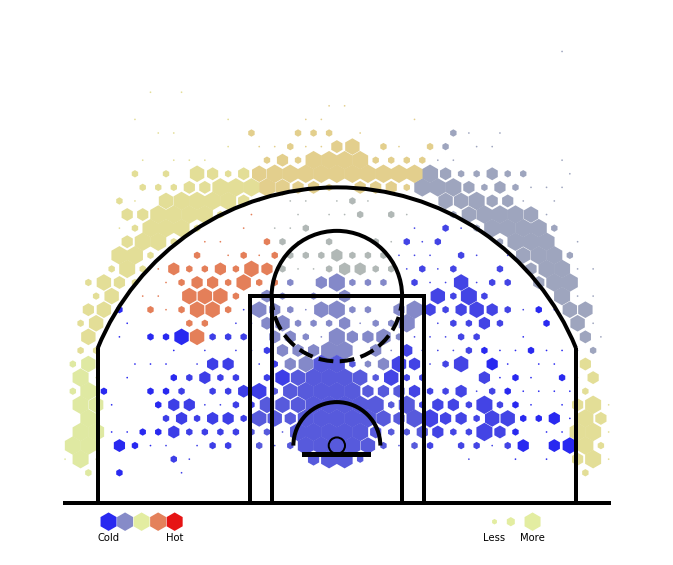

In [75]:
plot_team_compare.grantland_shotchart(post_df, reg)

https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2013-14&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2013-14&SeasonSegment=&SeasonType=Playoffs&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=1610612744&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID=
